In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import string
import pandas as pd
import censusdata
from tabulate import tabulate
import folium

## Importacion de Datos

In [122]:
data = pd.read_csv('GunDeaths.csv')
data

,victimID,date,name,gender,age,ageGroup,city,state,lat,lng,url
0,1,14/12/2012,Antida Archuleta,F,20.0,3.0,Westminster,CO,39.893668,-105.072112,http://www.9news.com/rss/story.aspx?storyid=30...
1,2,14/12/2012,Charlotte Bacon,F,6.0,1.0,Newtown,CT,41.412323,-73.311424,http://www.cnn.com/2012/12/15/us/connecticut-s...
2,3,14/12/2012,Olivia Engel,F,6.0,1.0,Newtown,CT,41.412323,-73.311424,http://www.cnn.com/2012/12/15/us/connecticut-s...
3,4,14/12/2012,Ana Marquez-Greene,F,6.0,1.0,Newtown,CT,41.412323,-73.311424,http://www.cnn.com/2012/12/15/us/connecticut-s...
4,5,14/12/2012,Dylan Hockley,M,6.0,1.0,Newtown,CT,41.412323,-73.311424,http://www.cnn.com/2012/12/15/us/connecticut-s...
...,...,...,...,...,...,...,...,...,...,...,...
7222,8017,14/08/2013,NaN,M,NaN,3.0,Sacramento,CA,38.484076,-121.074011,http://sacramento.cbslocal.com/2013/08/14/man-...
7223,8018,14/08/2013,NaN,M,NaN,3.0,Garland,TX,32.907845,-96.645463,http://www.wfaa.com/news/crime/Felony-suspect-...
7224,8020,14/08/2013,NaN,NaN,NaN,NaN,Hartford,CT,41.765599,-72.690586,http://www.wfsb.com/story/23139368/police-inve...
7225,8022,14/08/2013,Blayke Ladd,M,21.0,3.0,Oklahoma City,OK,35.470742,-97.519881,http://www.koco.com/news/oklahomanews/okc/okc-...


## Exploración de Datos

### Formato de datos

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   victimID  7227 non-null   int64  
 1   date      7227 non-null   object 
 2   name      6385 non-null   object 
 3   gender    7187 non-null   object 
 4   age       6647 non-null   float64
 5   ageGroup  7021 non-null   float64
 6   city      7227 non-null   object 
 7   state     7227 non-null   object 
 8   lat       7227 non-null   float64
 9   lng       7227 non-null   float64
 10  url       7227 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 621.2+ KB


In [124]:
print(data.state.unique())
print(data.city.unique())

['CO' 'CT' 'OH' 'FL' 'MI' 'NV' 'NC' 'oh' 'TN' 'TX' 'UT' 'CA' 'NY' 'VA'
 'IN' 'AL' 'AZ' 'IL' 'MD' 'MA' 'MO' 'NJ' 'OK' 'PA' 'WI' 'OR' 'DC' 'GA'
 'KS' 'LA' 'MS' 'NH' 'NM' 'SC' 'WA' 'IA' 'MN' 'SD' 'KY' 'ny' 'AR' 'WV'
 'NE' 'DE' 'AK' 'MT' 'VT' 'HI' 'ME' 'Fl' 'ID' 'WY' 'RI' 'ND' 'va']
['Westminster' 'Newtown' 'Chester' ... 'St. Joseph' 'Shelton' 'Hubert']


In [125]:
# Some states are repeated but with different formats (uppercase and lowercase)
# We need to make them all uppercase to avoid duplicates when grouping
data['state'] = data['state'].str.upper()
print(data.state.unique())
print(len(data.state.unique()))



['CO' 'CT' 'OH' 'FL' 'MI' 'NV' 'NC' 'TN' 'TX' 'UT' 'CA' 'NY' 'VA' 'IN'
 'AL' 'AZ' 'IL' 'MD' 'MA' 'MO' 'NJ' 'OK' 'PA' 'WI' 'OR' 'DC' 'GA' 'KS'
 'LA' 'MS' 'NH' 'NM' 'SC' 'WA' 'IA' 'MN' 'SD' 'KY' 'AR' 'WV' 'NE' 'DE'
 'AK' 'MT' 'VT' 'HI' 'ME' 'ID' 'WY' 'RI' 'ND']
51


In [126]:
print(data.city.unique())
print(len(data.city.unique()))

['Westminster' 'Newtown' 'Chester' ... 'St. Joseph' 'Shelton' 'Hubert']
2074


In [127]:
data["date"]= pd.to_datetime(data["date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   victimID  7227 non-null   int64         
 1   date      7227 non-null   datetime64[ns]
 2   name      6385 non-null   object        
 3   gender    7187 non-null   object        
 4   age       6647 non-null   float64       
 5   ageGroup  7021 non-null   float64       
 6   city      7227 non-null   object        
 7   state     7227 non-null   object        
 8   lat       7227 non-null   float64       
 9   lng       7227 non-null   float64       
 10  url       7227 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 621.2+ KB


/var/folders/h4/3w1ndbld1bl7hnc6b9pzsphr0000gn/T/ipykernel_70401/2474662064.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["date"]= pd.to_datetime(data["date"])


### Distribución de Variables

In [128]:
data.describe()

,victimID,age,ageGroup,lat,lng
count,7227.000000,6647.000000,7021.000000,7227.000000,7227.000000
mean,3988.739726,32.938168,2.903717,37.075201,-91.279574
std,2341.235147,14.880857,0.363372,4.964210,15.030133
min,1.000000,0.000000,0.000000,19.345319,-163.729444
25%,1979.500000,22.000000,3.000000,33.670702,-96.800008
50%,3932.000000,29.000000,3.000000,37.825115,-87.337137
75%,6054.500000,42.000000,3.000000,40.735657,-80.414080
max,8024.000000,95.000000,3.000000,64.837780,-67.278604


### Valores Faltantes

In [129]:
data.isna().sum()

victimID      0
date          0
name        842
gender       40
age         580
ageGroup    206
city          0
state         0
lat           0
lng           0
url           0
dtype: int64

In [130]:
data[data["age"].isna()]

,victimID,date,name,gender,age,ageGroup,city,state,lat,lng,url
44,1337,2012-12-14,Omar Vargas,M,NaN,3.0,Exeter,CA,36.296061,-119.142052,http://www.fresnobee.com/2012/12/15/3102757/fa...
50,2324,2012-12-15,NaN,M,NaN,3.0,Richmond,VA,37.541239,-77.442018,http://www.timesdispatch.com/news/latest-news/...
119,1214,2012-12-16,NaN,M,NaN,3.0,Newark,NJ,40.735657,-74.172367,http://www.nj.com/essex/index.ssf/2012/12/targ...
179,2321,2012-12-19,NaN,M,NaN,3.0,Pikeville,KY,37.479267,-82.518763,http://www.wkyt.com/wymt/home/headlines/Shooti...
180,2415,2012-12-19,NaN,M,NaN,3.0,Detroit,MI,42.348664,-83.056737,http://www.detroitmi.gov/Portals/0/docs/police...
...,...,...,...,...,...,...,...,...,...,...,...
7217,8015,2013-08-13,Archie Smith,M,NaN,3.0,Crawford,AL,30.764077,-88.227783,http://www.wtvm.com/story/23129612/man-dead-af...
7222,8017,2013-08-14,NaN,M,NaN,3.0,Sacramento,CA,38.484076,-121.074011,http://sacramento.cbslocal.com/2013/08/14/man-...
7223,8018,2013-08-14,NaN,M,NaN,3.0,Garland,TX,32.907845,-96.645463,http://www.wfaa.com/news/crime/Felony-suspect-...
7224,8020,2013-08-14,NaN,NaN,NaN,NaN,Hartford,CT,41.765599,-72.690586,http://www.wfsb.com/story/23139368/police-inve...


### Date ranges
Data ranges from December 2012 to December 2013.

In [131]:
print(data["date"].max())
print(data["date"].min())


2013-12-08 00:00:00
2012-12-14 00:00:00


### Definición de variable ```ageGroup```

In [132]:
data_age_group = data.groupby('ageGroup').agg({'age':["min", "mean", "max"]}).reset_index()
data_age_group.columns = ['ageGroup', 'Lower Boundary', 'Age Mean', 'Upper Boundary']
data_age_group

,ageGroup,Lower Boundary,Age Mean,Upper Boundary
0,0.0,NaN,NaN,NaN
1,1.0,0.0,6.548387,12.0
2,2.0,13.0,15.894737,17.0
3,3.0,18.0,34.608873,95.0


### Distribución de presencia de edades por grupo de edad

1
2
3


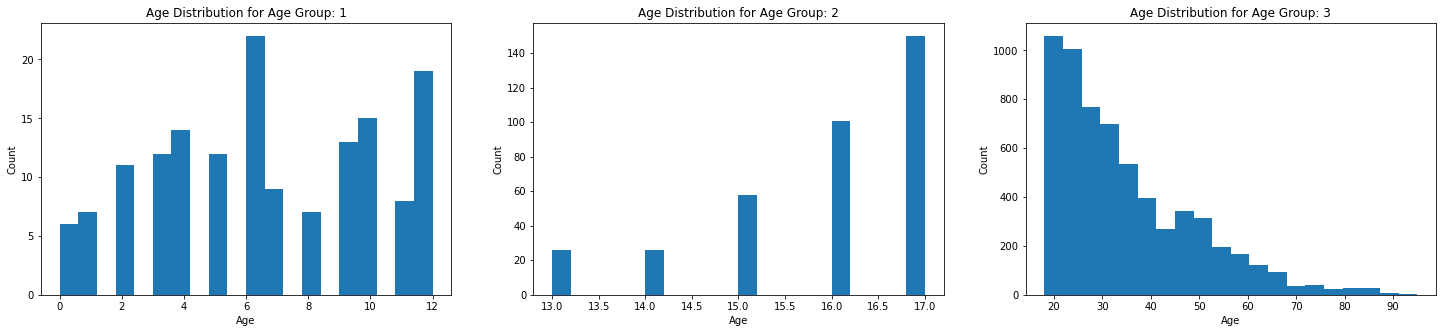

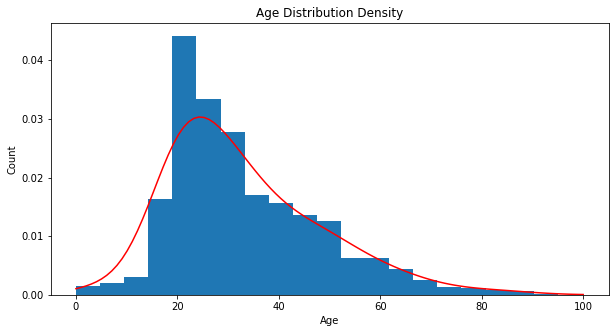

In [133]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25, 5))

for group in [1,2,3]:
    print(group)
    axs[group-1].set_title("Age Distribution for Age Group: {}".format(group))
    axs[group-1].hist(data[data["ageGroup"]==group]["age"], bins=20)
    axs[group-1].set_xlabel("Age")
    axs[group-1].set_ylabel("Count")
    
plt.figure(figsize=(10, 5))
plt.ylabel("Count")
plt.xlabel("Age")
plt.title("Age Distribution Density")

kde = stats.gaussian_kde(data["age"].dropna(), bw_method=0.4)
plt.hist(data["age"], bins=20, density=1)
plt.plot(np.linspace(0, 100, 100), kde(np.linspace(0, 100, 100)), color='r')


### Lapso entre Gun Deaths Events

### Ciudades/Estados con mayor cantidad de eventos y muertes

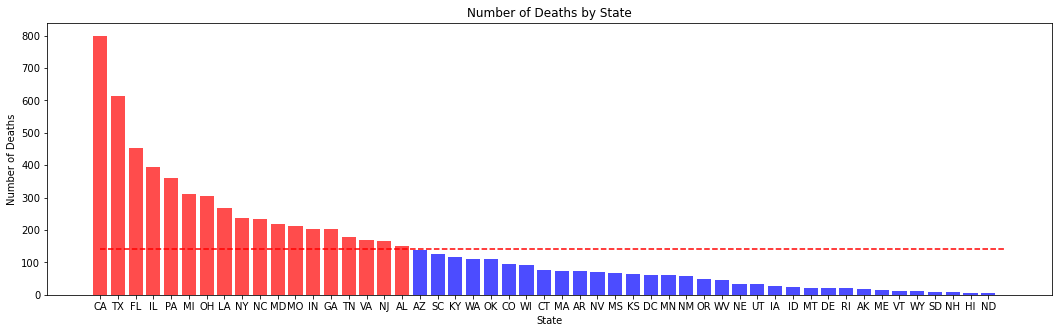

In [134]:
data_state= data.groupby(["state"]).agg({"date": "count", "lat": "mean", "lng": "mean"}).reset_index()[["state","date", "lng", "lat"]].rename(columns={"date": "deaths"}).sort_values(by="deaths", ascending=False)
data_state["is_above_mean"] = data_state["deaths"] > np.mean(data_state["deaths"])


#BAR PLOT
plt.figure(figsize=(18, 5))
plt.bar(data_state["state"], data_state["deaths"], color=data_state["is_above_mean"].map({True: 'r', False: 'b'}), alpha=0.7)
plt.hlines(y=np.mean(data_state["deaths"]), xmin=0, xmax=len(data_state["state"]), color='r', linestyle='--')
plt.title("Number of Deaths by State")
plt.xlabel("State")
plt.ylabel("Number of Deaths")


# MAP
center = [41.593684,-95.96288]
data_state["color"]= data_state["is_above_mean"].map({True: 'crimson', False: 'blue'})

# creating map
map = folium.Map(location = center, zoom_start = 4.3)
for i, j in data_state.iterrows():
   folium.Circle(
      location=[j['lat'], j['lng']],
      #popup=data.iloc[i]['name'],
      radius=float(j["deaths"])*500,
      color=j["color"],
      fill=True,
      fill_color=j["color"]
   ).add_to(map)
map.save('./gun_deaths_by_state.html')
map

### Gun deaths by 100,000 residents during 2013

In [135]:
#Getting data from census
df_pop= pd.read_csv("pop.csv")  
df_pop = df_pop[["Geographic Area Name (Grouping)","7/1/2013 population estimate!!Population"]].rename(columns={"Geographic Area Name (Grouping)": "state", "7/1/2013 population estimate!!Population": "population"})
state_abbr = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
} #From Github

state_abbr = {v: k for k, v in state_abbr.items()}
df_pop=df_pop.replace({"state": state_abbr})

In [136]:
data_state= pd.merge(data_state, df_pop, left_on="state", right_on="state", how="left")
data_state["population"]= data_state["population"].str.replace(",","").astype(int)
data_state["100k"]= data_state["population"]/100000
data_state["Deaths per 100k"]= data_state["deaths"]/data_state["100k"]
data_state.head(5)

,state,deaths,lng,lat,is_above_mean,color,population,100k,Deaths per 100k
0,CA,799,-119.737517,35.881323,True,crimson,38260787,382.60787,2.088300
1,TX,613,-96.912985,31.065440,True,crimson,26480266,264.80266,2.314931
2,FL,452,-81.501296,27.944926,True,crimson,19545621,195.45621,2.312538
3,IL,396,-88.009401,41.532253,True,crimson,12895129,128.95129,3.070927
4,PA,360,-76.626361,40.272539,True,crimson,12776309,127.76309,2.817715


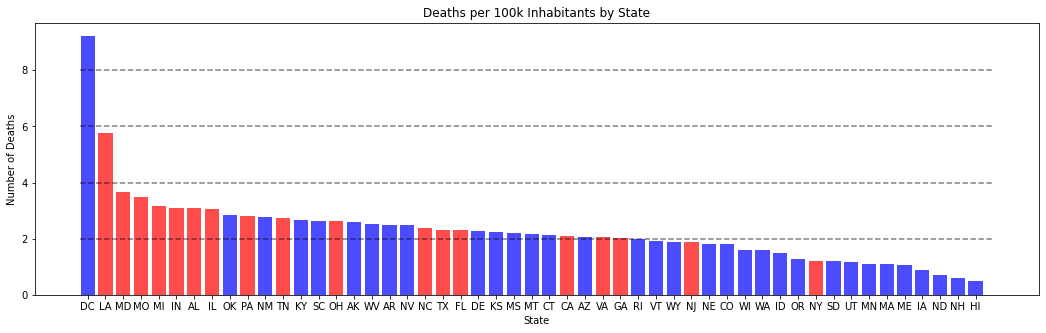

In [137]:
#Adjusted Barplot
data_state_sorted= data_state.sort_values(by="Deaths per 100k", ascending=False)
plt.figure(figsize=(18, 5))
plt.bar(data_state_sorted["state"], data_state_sorted["Deaths per 100k"], color=data_state_sorted["is_above_mean"].map({True: 'r', False: 'b'}), alpha=0.7)
plt.hlines(y=2, xmin=-0.42, xmax=len(data_state_sorted["state"]), color='black', linestyle='--', alpha=0.5)
plt.hlines(y=4, xmin=-0.42, xmax=len(data_state_sorted["state"]), color='black', linestyle='--', alpha=0.5)
plt.hlines(y=6, xmin=-0.42, xmax=len(data_state_sorted["state"]), color='black', linestyle='--', alpha=0.5)
plt.hlines(y=8, xmin=-0.42, xmax=len(data_state_sorted["state"]), color='black', linestyle='--', alpha=0.5)
plt.title("Deaths per 100k Inhabitants by State")
plt.xlabel("State")
plt.ylabel("Number of Deaths")



# MAP
center = [41.593684,-95.96288]
data_state["color"]= data_state["is_above_mean"].map({True: 'crimson', False: 'blue'})
# creating map
map = folium.Map(location = center, zoom_start = 4.3)
for i, j in data_state.iterrows():
   folium.Circle(
      location=[j['lat'], j['lng']],
      #popup=data.iloc[i]['name'],
      radius=float(j["Deaths per 100k"])*40000,
      color=j["color"],
      fill=True,
      fill_color=j["color"]
   ).add_to(map)
map.save('./gun_deaths_by_state_per_100k.html')
map

### Suma acumulada de muertes por armas de fuego por año para estados por derriba de la media

In [138]:
data.groupby(["date", "state", "city"]).count().reset_index()[["date","state", "city","victimID"]].sort_values(by="victimID", ascending=False).head(10).rename(columns={"victimID": "deaths"})

,date,state,city,deaths
2,2012-12-14,CT,Newtown,28
4146,2013-06-26,IL,Chicago,8
4862,2013-07-26,FL,Hialeah,7
4409,2013-07-06,CA,Santa Monica,6
2938,2013-04-24,IL,Manchester,6
1112,2013-01-26,IL,Chicago,6
2876,2013-04-21,WA,Federal Way,5
2828,2013-04-19,MI,Detroit,5
940,2013-01-19,NM,South Valley,5
4025,2013-06-22,MD,Baltimore,5


/var/folders/h4/3w1ndbld1bl7hnc6b9pzsphr0000gn/T/ipykernel_70401/2075015053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_state_by_day['cumulative_sum'] = data_state_by_day['victimID'].cumsum();
/var/folders/h4/3w1ndbld1bl7hnc6b9pzsphr0000gn/T/ipykernel_70401/2075015053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_state_by_day['cumulative_sum'] = data_state_by_day['victimID'].cumsum();
/var/folders/h4/3w1ndbld1bl7hnc6b9pzsphr0000gn/T/ipykernel_70401/2075015053.py:5: SettingWithCopyWar

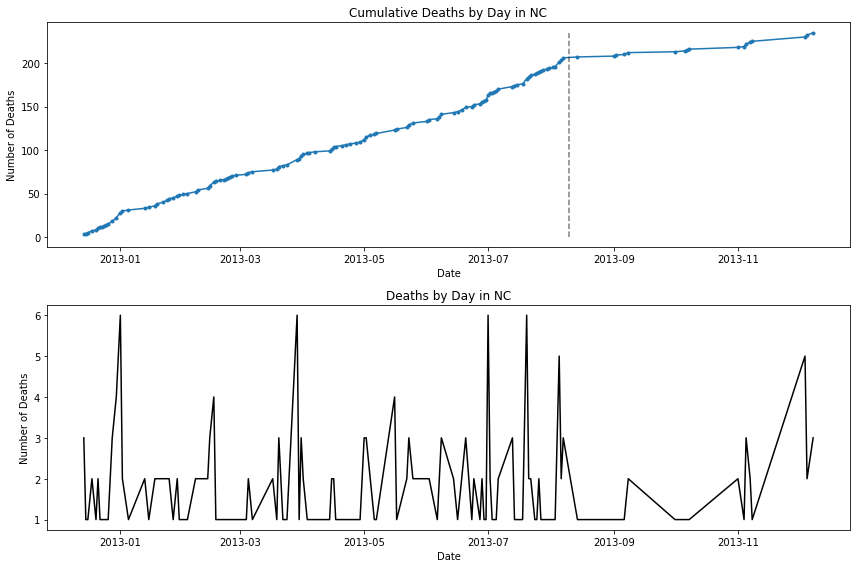

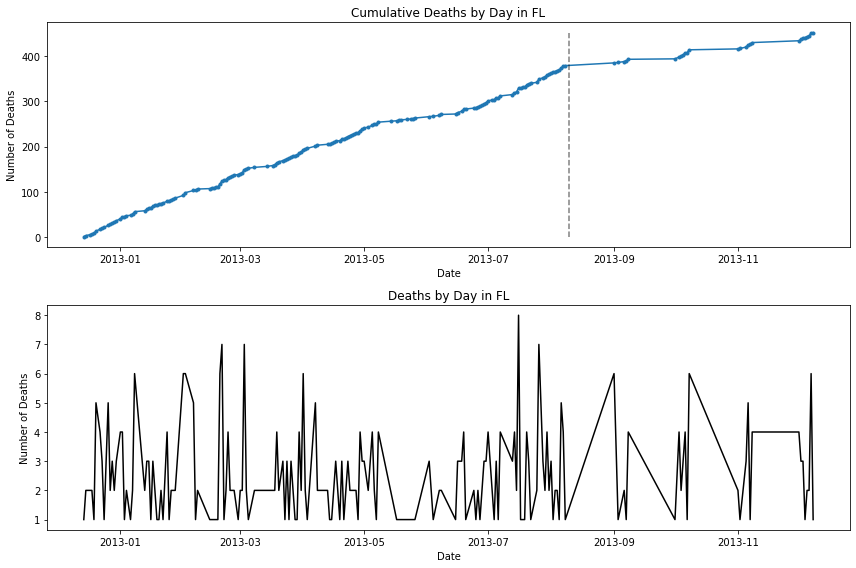

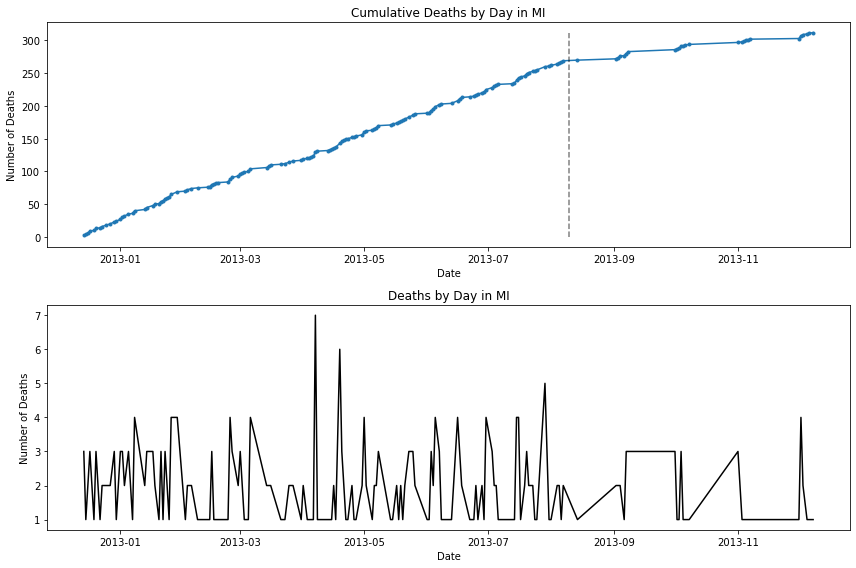

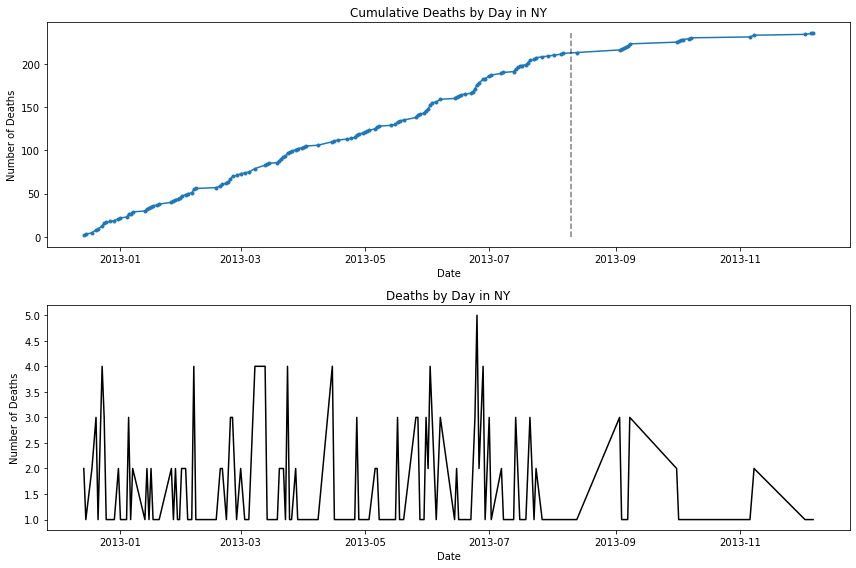

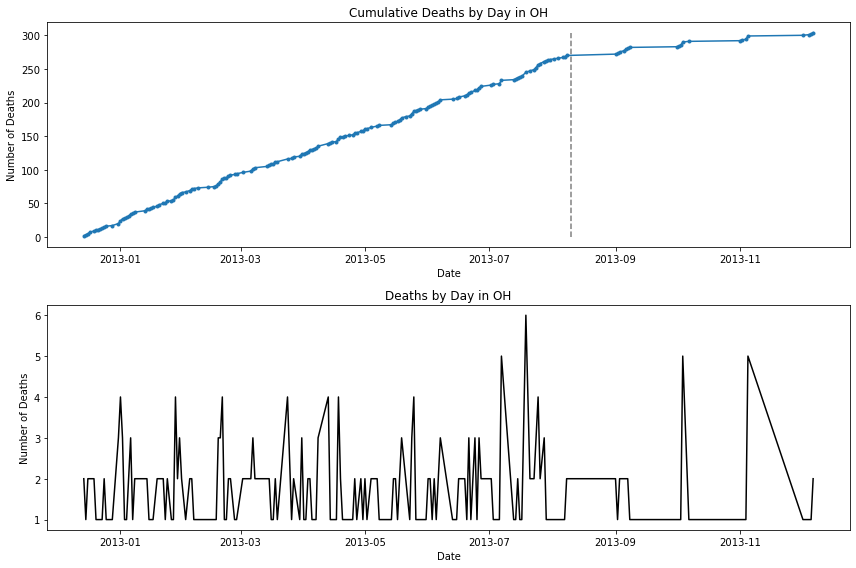

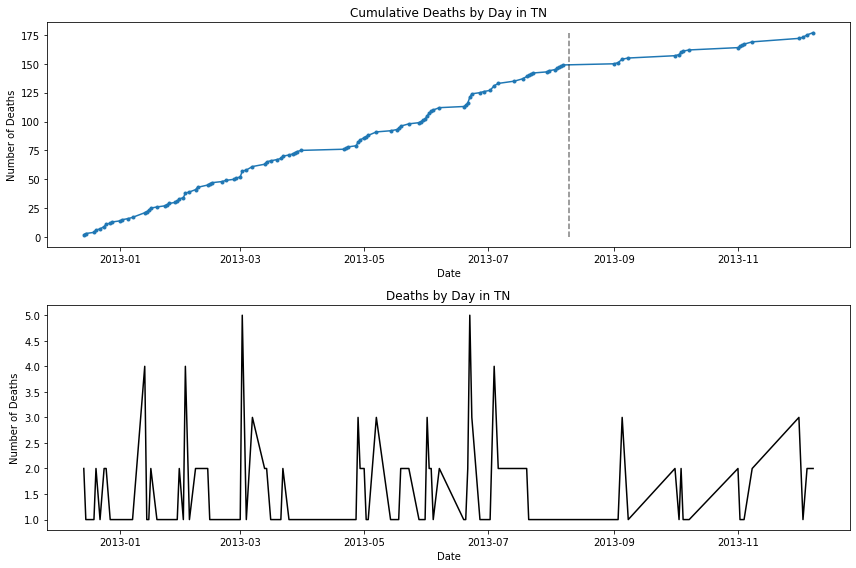

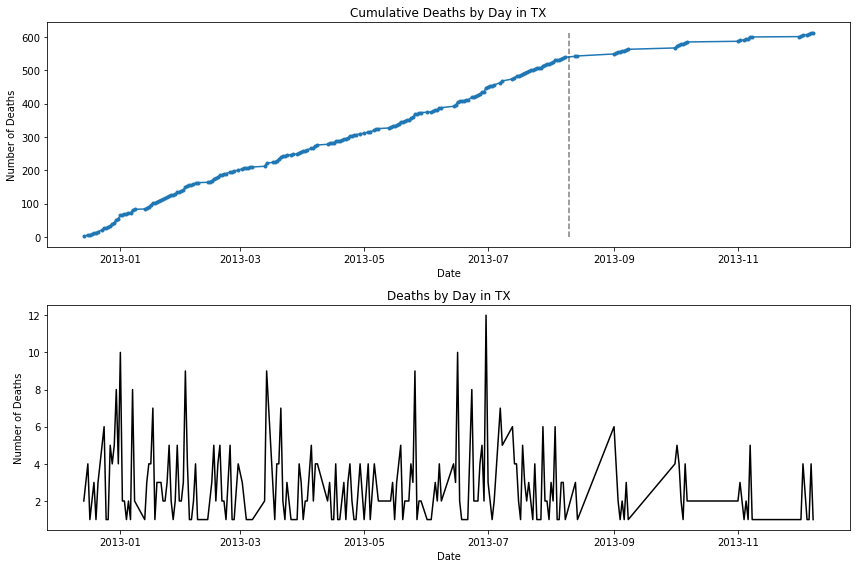

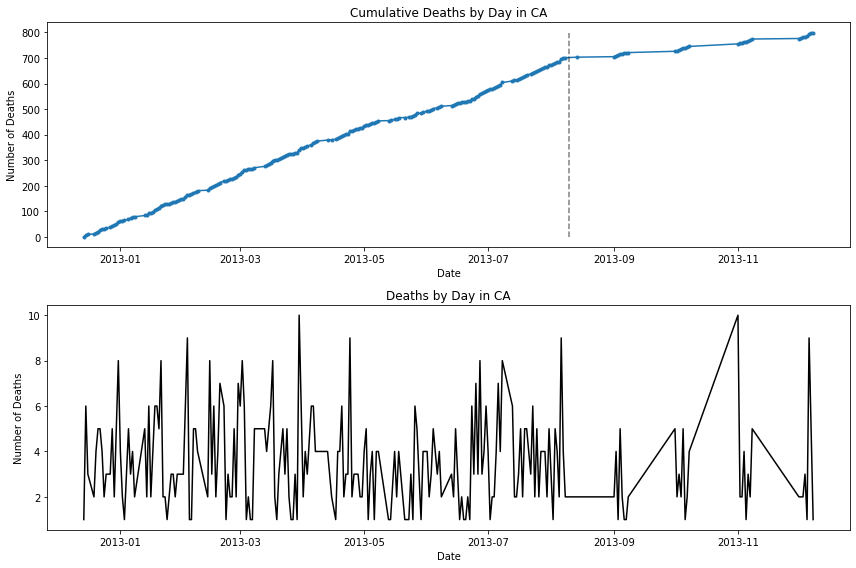

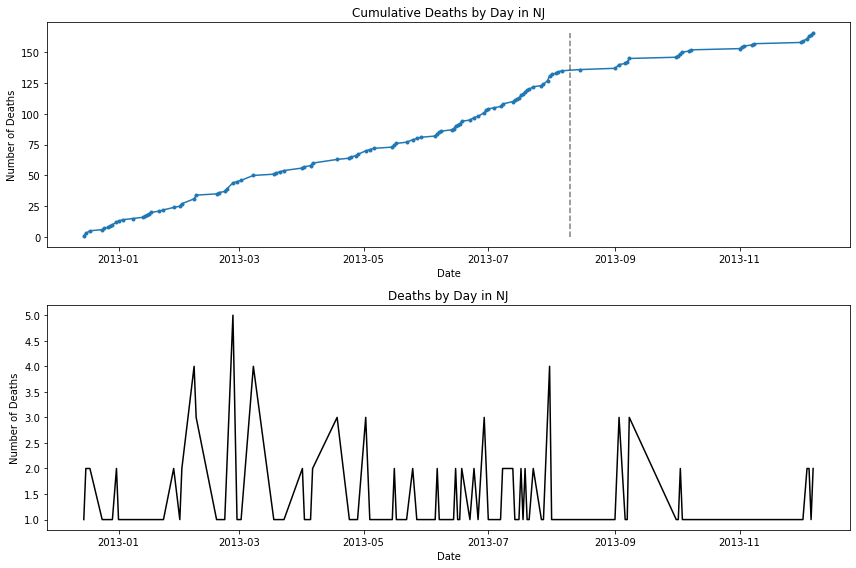

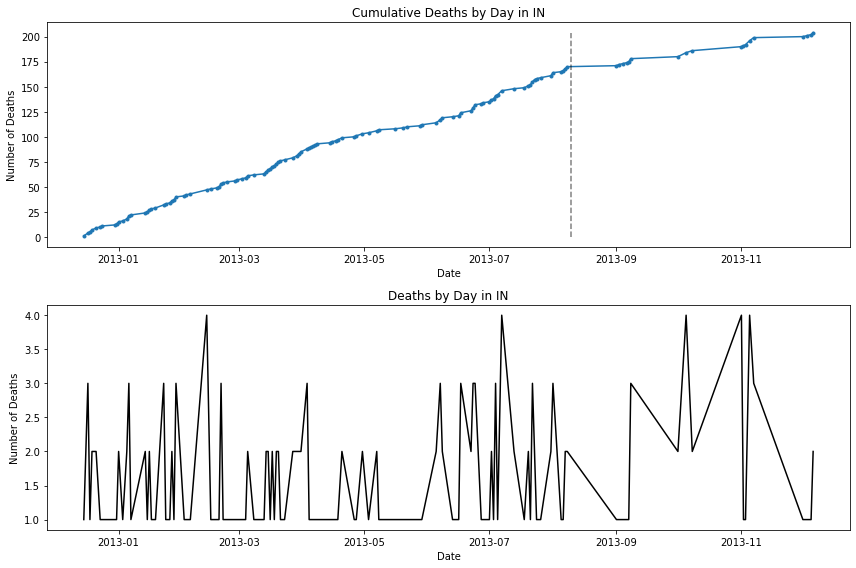

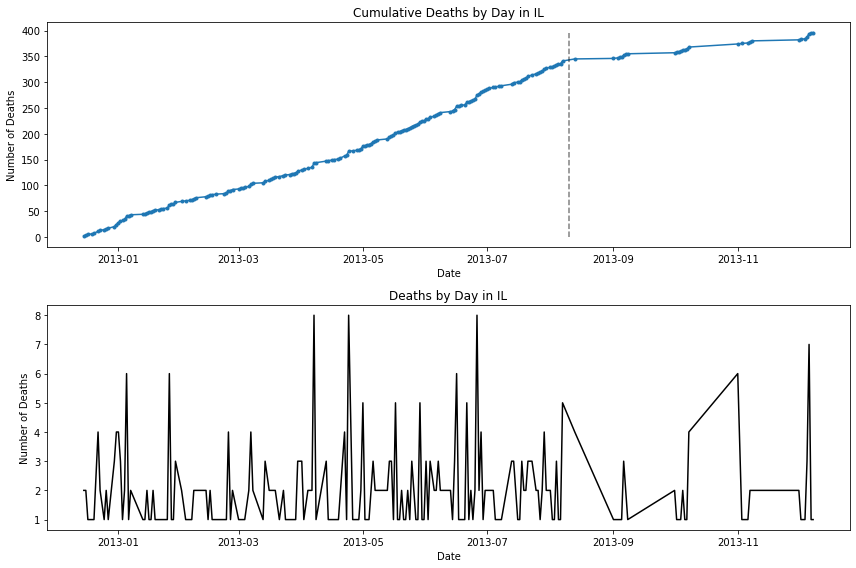

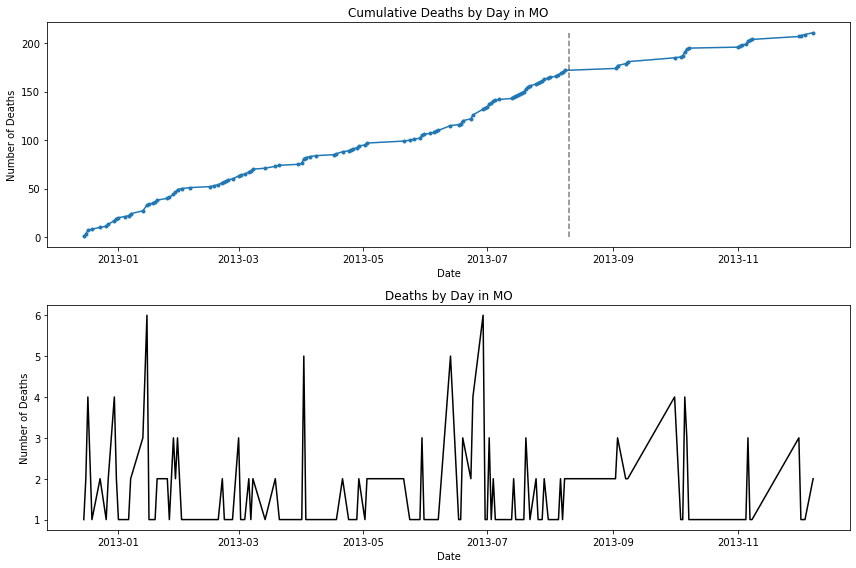

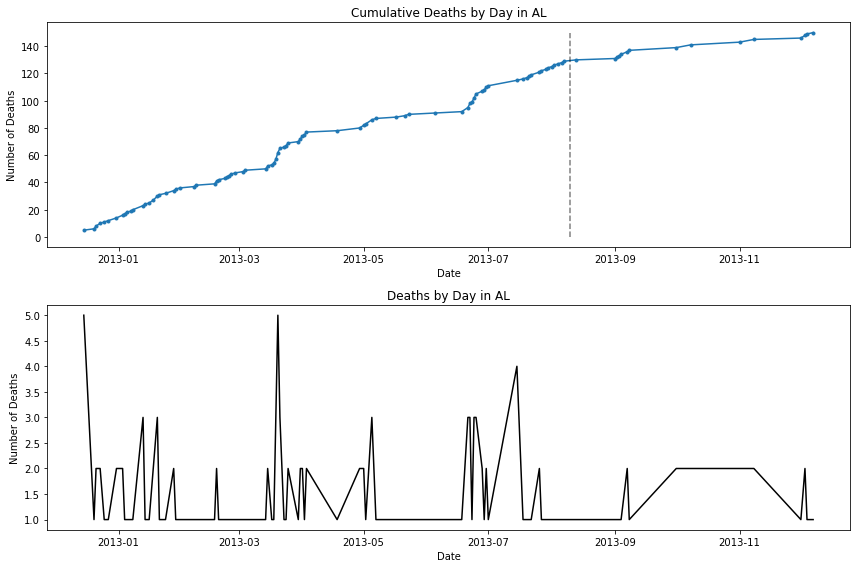

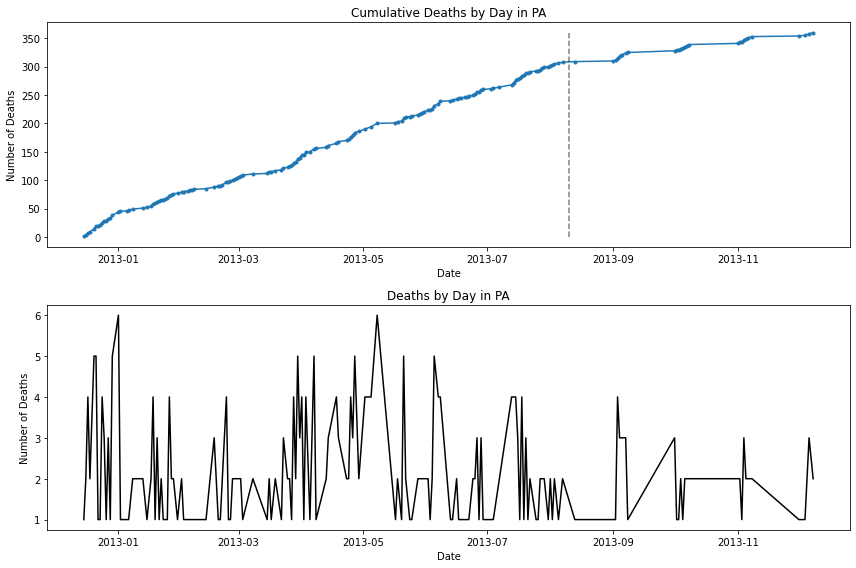

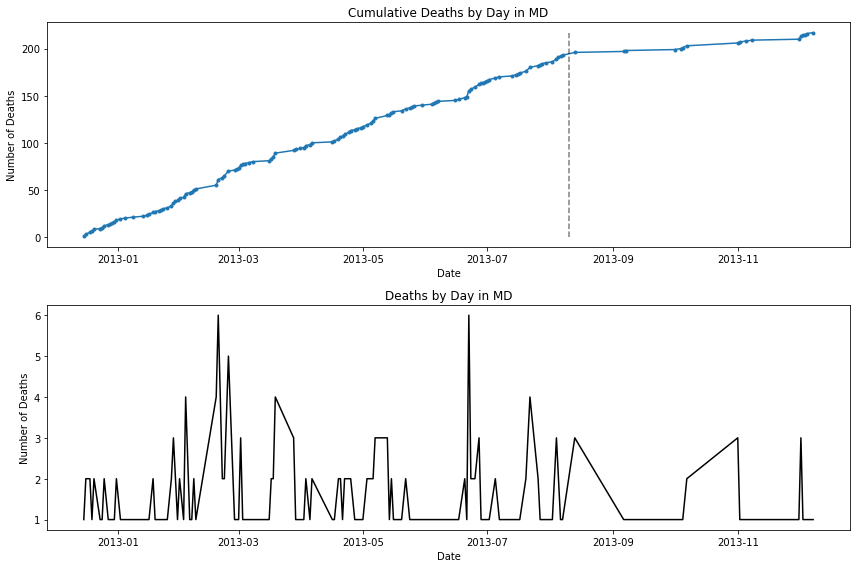

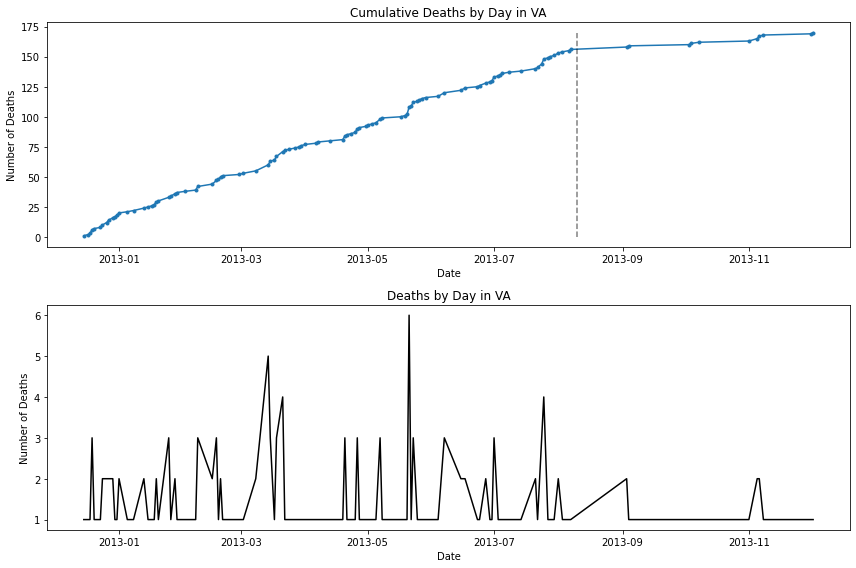

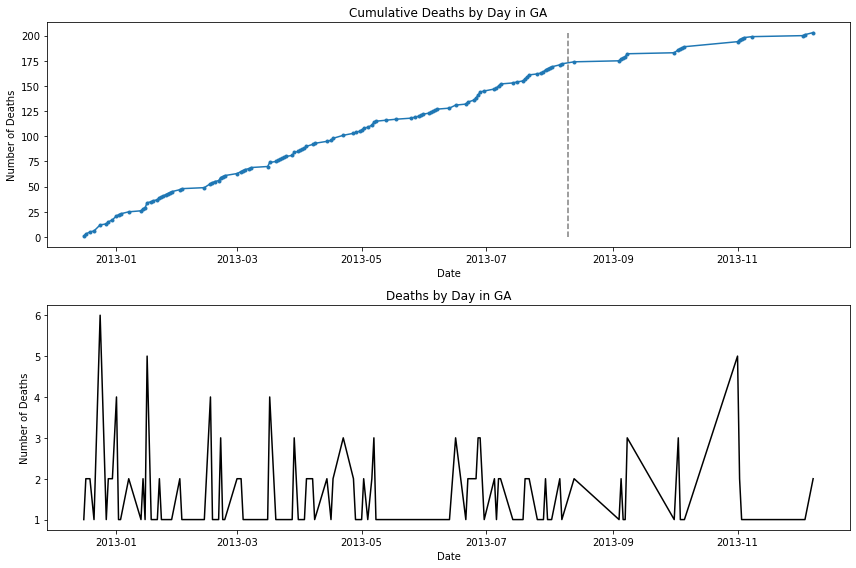

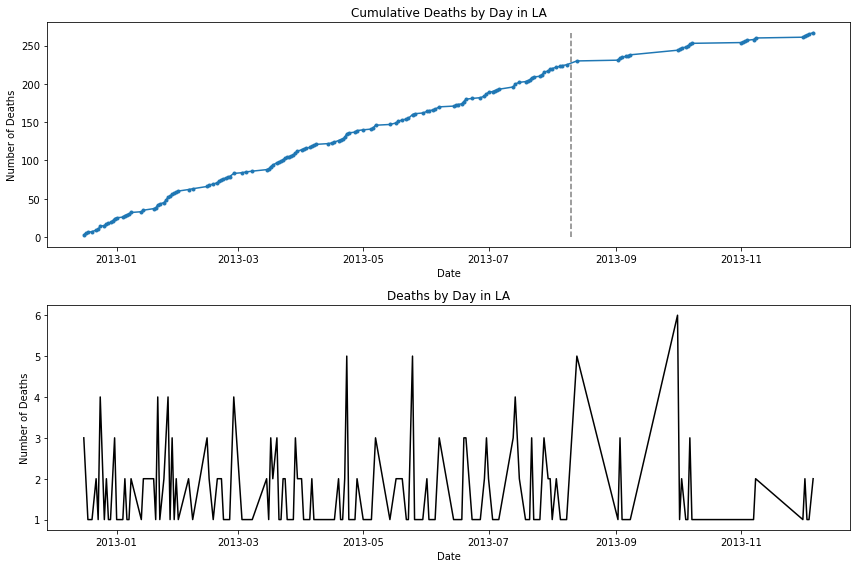

In [139]:
state_by_day= data.groupby(["state","date"]).count().reset_index().sort_values(by="date", ascending=True);
state_by_day= pd.merge(state_by_day, data_state[["state","deaths", "is_above_mean"]], left_on="state", right_on="state", how="left");
for state in state_by_day[state_by_day["is_above_mean"]== True]["state"].unique():
    data_state_by_day= state_by_day[state_by_day["state"]==state];
    data_state_by_day['cumulative_sum'] = data_state_by_day['victimID'].cumsum();
    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,8))
    axs[0].plot(data_state_by_day["date"], data_state_by_day["cumulative_sum"], marker='o', markersize=3)
    axs[0].set_title("Cumulative Deaths by Day in " + state)
    axs[0].set_xlabel("Date")
    axs[0].set_ylabel("Number of Deaths")
    axs[0].vlines(x=pd.to_datetime("2013-08-10"), ymin=0, ymax= data_state_by_day["cumulative_sum"].max() , color='black', linestyle='--', alpha=0.5)
    axs[1].plot(data_state_by_day["date"], data_state_by_day["victimID"], color='black')
    axs[1].set_title("Deaths by Day in " + state)
    axs[1].set_xlabel("Date")
    axs[1].set_ylabel("Number of Deaths")
    plt.tight_layout()

### Suma acumulada general

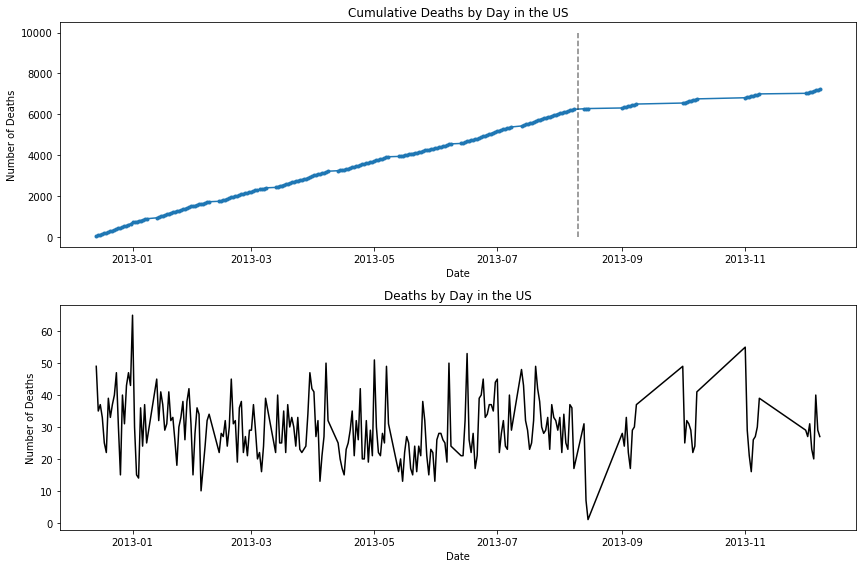

In [140]:
data= data.sort_values(by="date", ascending=True)
data_by_date= data.groupby(["date"]).count().reset_index().sort_values(by="date", ascending=True);
data_by_date["cumulative_deaths"]= data_by_date["victimID"].cumsum()
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,8))
axs[0].plot(data_by_date["date"], data_by_date["cumulative_deaths"], marker='o', markersize=3)
axs[0].set_title("Cumulative Deaths by Day in the US")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Number of Deaths")
axs[1].plot(data_by_date["date"], data_by_date["victimID"], color='black')
axs[1].set_title("Deaths by Day in the US")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Number of Deaths")
plt.tight_layout()
axs[0].vlines(x=pd.to_datetime("2013-08-10"), ymin=0, ymax=10000, color='black', linestyle='--', alpha=0.5)

Tras investigación de Contexto, se identifica que el evento donde hubo más muertes por armas de fuego coincide con el evento del tiroteo de Sandy Hook, que ocurrió el 14 de Diciembre de 2012.
Entre los demás eventos, se encuentran tiroteos en South Florida y Chicago

## Prueba de Hipotesis: Diferencia de edades entre victimas H y M

In [141]:
data_h= data[["victimID", "name", "gender", "age","city","state"]]
data_h_m= data[data["gender"]== "M"]
data_h_f= data[data["gender"]== "F"]



x_bar_m= data_h_m["age"].mean()
x_bar_f= data_h_f["age"].mean()

print("Null Hypothesis:         x_bar_m - x_bar_f = 0")
print("Alternative Hypothesis:  x_bar_m - x_bar_f != 0 \n")

point_estimate= x_bar_m - x_bar_f
print("Point Estimate: " + str(point_estimate))

se_x= np.sqrt((data_h_m["age"].var()/data_h_m.shape[0]) + (data_h_f["age"].var()/data_h_f.shape[0]))
print("Standard Error: " + str(se_x))

degrees_of_freedom= np.min([data_h_m.shape[0] -1, data_h_f.shape[0] - 1])
print("Degrees of Freedom: " + str(degrees_of_freedom))

t_df= stats.t.ppf(0.025, degrees_of_freedom)
print("t-value: " + str(t_df))

confidence_interval= [point_estimate - t_df*se_x, point_estimate + t_df*se_x]
print("Confidence Interval with 95% Confidence: " + str(confidence_interval))

t_statistic= (point_estimate-0)/se_x
print("t-statistic: " + str(t_statistic))

p_value= stats.t.sf(np.abs(t_statistic), degrees_of_freedom)*2
print("p-value: " + str(p_value))

print(f"\n{p_value} < 0.05 ... Reject Null Hypothesis") 
print("There is a difference between the Age of Male and Female Victims\nWith a 95% confidence, we can say that the data supports that the average age of Male victims is lower than that of the Female victims")


Null Hypothesis:         x_bar_m - x_bar_f = 0
Alternative Hypothesis:  x_bar_m - x_bar_f != 0 

Point Estimate: -4.945144832265925
Standard Error: 0.5772825923525343
Degrees of Freedom: 1084
t-value: -1.9621548306541179
Confidence Interval with 95% Confidence: [-3.8124270050288676, -6.077862659502982]
t-statistic: -8.566246233259063
p-value: 3.625184350447542e-17

3.625184350447542e-17 < 0.05 ... Reject Null Hypothesis
There is a difference between the Age of Male and Female Victims
With a 95% confidence, we can say that the data supports that the average age of Male victims is lower than that of the Female victims


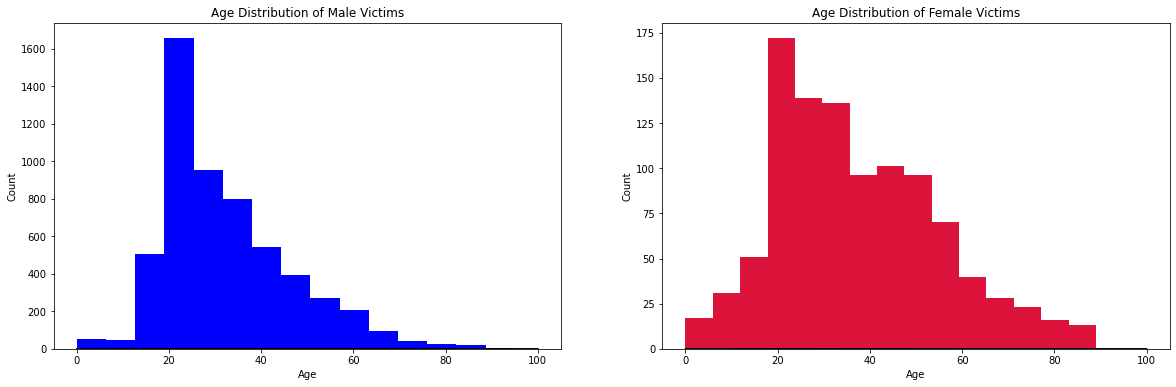

In [142]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 6))
group_= ["Male", "Female"]
colors= ["blue", "crimson"]
for i,group in enumerate([data_h_m, data_h_f]):
    axs[i].hist(group["age"], bins=15, color=colors[i], density=0)
    kde_f = stats.gaussian_kde(data_h["age"].dropna(), bw_method=1000)
    axs[i].plot(np.linspace(0, 100, 100), kde(np.linspace(0, 100, 100)), color='black')
    axs[i].set_title("Age Distribution of " + group_[i] + " Victims")
    axs[i].set_xlabel("Age")
    axs[i].set_ylabel("Count")

## Independence Test For Gender vs State

In [143]:
data_ind_test = pd.pivot_table(data, index=["state"], values=["victimID"], columns=["gender"] ,aggfunc="count").reset_index()
data_ind_test.columns = data_ind_test.columns.droplevel(0)
data_ind_test.columns = ["state", "F", "M"]
data_ind_test.dropna(inplace=True)
data_ind_test= pd.merge(data_ind_test, data_state[["state", "100k"]], on="state", how="left")
data_ind_test["F_per_100k"]= data_ind_test["F"]/data_ind_test["100k"]
data_ind_test["M_per_100k"]= data_ind_test["M"]/data_ind_test["100k"] #util pq esto "normaliza" los valores de F_per_100k entre todos los estados y ya no se trata de solo conteo absoluto

data_ind_test= data_ind_test[["state", "F_per_100k", "M_per_100k"]]
data_ind_test["Total"]= data_ind_test["F_per_100k"] + data_ind_test["M_per_100k"]
states= data_ind_test["state"].unique().tolist()
data_ind_test= data_ind_test.transpose()
data_ind_test["Total"]= data_ind_test.sum(axis=1)

print("Null Hypothesis: Amount of Female Victims per 100K Habitants doesn't depend on the State")
print("Alternative Hypothesis: Amount of Female Victims per 100K Habitants does depend on the State")

expected_victims_F= data_ind_test["Total"][1] / data_ind_test["Total"][3]
print("Expected Victims per 100K of gender F: " + str(expected_victims_F))
data_ind_test.columns= data_ind_test.iloc[0]
data_ind_test.drop(index=data_ind_test.index[0], axis=0, inplace=True)

n_rows= data_ind_test.shape[0]
n_columns= data_ind_test.shape[1]-2
n_cells= n_columns * n_rows


for state in (states):
    column_values= []
    total_state= data_ind_test[state].values[2]
    f_per_100_expected= total_state * expected_victims_F
    m_per_100_expected= total_state * (1-expected_victims_F)
    column_values.append(f_per_100_expected)
    column_values.append(m_per_100_expected)
    column_values.append(total_state)
    data_ind_test[state + "_expected"]= column_values
  
display(data_ind_test)

chi_square= 0
for state in (states):
    chi_state= ((data_ind_test[state][0] - data_ind_test[state+ "_expected"][0])**2) / data_ind_test[state+ "_expected"][0]
    #print(state + ": " + str(chi_state))
    chi_square += chi_state

print("Final Chi-Square: " + str(chi_square))


degrees_of_freedom= (n_rows-1) * (n_columns-1)
print("Degrees of Freedom: " + str(degrees_of_freedom))

chi_square_p_val= stats.chi2.cdf(chi_square, df=degrees_of_freedom)
print("P-Value: " + str(chi_square_p_val))

print(f"\n{chi_square_p_val} < 0.05 ... Reject Null Hypothesis")
print("Data suggests that the amount of victims per 100K habitants does change between the states\nThis is not a causality analysis, given that there could be other factors that are at play, but it does suggest that there\nis a correlation between the amount of victims per 100K habitants and the state where the crime was committed")

Null Hypothesis: Amount of Female Victims per 100K Habitants doesn't depend on the State
Alternative Hypothesis: Amount of Female Victims per 100K Habitants does depend on the State
Expected Victims per 100K of gender F: 0.16033090025640812


state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD_expected,TN_expected,TX_expected,UT_expected,VA_expected,VT_expected,WA_expected,WI_expected,WV_expected,WY_expected
F_per_100k,0.678363,0.372665,0.506859,0.256303,0.256137,0.455491,0.611988,0.461126,0.541374,0.383718,...,0.190345,0.434505,0.366311,0.188127,0.330282,0.307241,0.250949,0.254327,0.406467,0.302967
M_per_100k,1.899418,2.71217,1.993647,1.809201,1.811254,1.347495,1.502153,8.761399,1.732397,1.913472,...,0.996858,2.275547,1.918409,0.985241,1.729718,1.609050,1.314247,1.331936,2.128710,1.586671
Total,2.577781,3.084834,2.500507,2.065504,2.067391,1.802987,2.114141,9.222526,2.273771,2.29719,...,1.187203,2.710052,2.284720,1.173369,2.060000,1.916290,1.565196,1.586263,2.535177,1.889638


Final Chi-Square: 3.9015307240250943
Degrees of Freedom: 96
P-Value: 1.014740334938878e-48

1.014740334938878e-48 < 0.05 ... Reject Null Hypothesis
Data suggests that the amount of victims per 100K habitants does change between the states
This is not a causality analysis, given that there could be other factors that are at play, but it does suggest that there
is a correlation between the amount of victims per 100K habitants and the state where the crime was committed
